# Homework 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from func import Func
from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

---
## Exercise 10.5

<img src="figures/homework-10/exercise-10.5.png" width="600" />


---
## Exercise 10.10

<img src="figures/homework-10/exercise-10.10.png" width="600" />


In [3]:
x1, x2 = sy.symbols('x1, x2')
f = Fraction(5, 2) * x1**2   +  Fraction(1,2) * x2**2   + 2*x1*x2  -  3*x1 - x2
f = Func(f, (x1, x2))
f

⎡    2                      2     ⎤
⎢5⋅x₁                     x₂      ⎥
⎢───── + 2⋅x₁⋅x₂ - 3⋅x₁ + ─── - x₂⎥
⎣  2                       2      ⎦

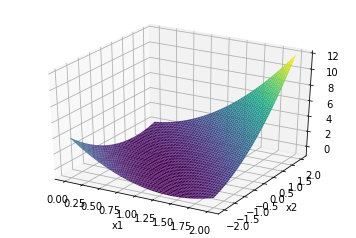

In [8]:
f.plot(range_x=(0, 2), range_y=(-2, 2))

---
### Exercise 10.10 a)

<img src="figures/homework-10/exercise-10.10-a.png" width="600" />


In [5]:
Q, b = f.as_quadratic_form_for_gradient_descent()
Q, b

⎛⎡5  2⎤  ⎡3⎤⎞
⎜⎢    ⎥, ⎢ ⎥⎟
⎝⎣2  1⎦  ⎣1⎦⎠

---
### Exercise 10.10 b)

<img src="figures/homework-10/exercise-10.10-b.png" width="600" />


The steps of the algorithm is as follows:

<img src="figures/lecture-10/conjugate-gradient-algorithm-steps.png" width="600" />



In [14]:
x0 = sy.Matrix([0, 0])
grad_at_x0 = f.gradient_at(x0)
grad_at_x0

⎡-3⎤
⎢  ⎥
⎣-1⎦

In [15]:
d0 = -grad_at_x0
d0

⎡3⎤
⎢ ⎥
⎣1⎦

In [ ]:
alpha0 = - g

---
### Exercise 10.10 c)

<img src="figures/homework-10/exercise-10.10-c.png" width="600" />


If we want to find the minimiser of $f$ analytically, we can use Corollary 6.1 (p 86). It says that we can find the a minimiser $\mathbf{x}^{*}$ by solving the following equation:
$$
\nabla f(\mathbf{x}^{*}) = \mathbf{0}
$$


We know that the gradient of the quadratic function is $\nabla f(\mathbf{x}) = Q\mathbf{x} - \mathbf{b}$. The FONC gives us two equations with two unknowns:

In [9]:
Q*f.func_args() - b

⎡5⋅x₁ + 2⋅x₂ - 3⎤
⎢               ⎥
⎣ 2⋅x₁ + x₂ - 1 ⎦

Solving the system of equations, we get:

In [11]:
sy.nonlinsolve(Q*f.func_args() - b, list(f.func_args()))

Thus, $\mathbf{x}^{*} = [1, -1]^T$

We could also rewritten the FONC to get following formula:
\begin{align}
\nabla f(\mathbf{x}^{*}) &= \mathbf{0} \\
 Q\mathbf{x}^{*} - \mathbf{b} &= \mathbf{0} \\
 Q\mathbf{x}^{*} &= \mathbf{b} \\
 Q^{-1}Q\mathbf{x}^{*} &= Q^{-1}\mathbf{b} \\
 \mathbf{x}^{*} &= Q^{-1}\mathbf{b} \\
\end{align}

In [12]:
Q.inv() * b

⎡1 ⎤
⎢  ⎥
⎣-1⎦